# 1일차 Review : 같은 문제 다시 풀어보기

    학습은 10번으로!

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
x = boston.data
y = boston.target

In [ ]:
x.shape, y.shape

((506, 13), (506,))

In [ ]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import *

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [ ]:
x_train.shape, y_train.shape

((404, 13), (404,))

In [ ]:
########
# 모델링
########
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(13,)))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 13969.4209
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 8788.9102
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 5299.7910
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 3125.4177
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 1852.3662
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 1125.7449
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 762.4797
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 527.6066
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 394.3465
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 301.4944


In [ ]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)
y_pred[:5]

array([[13.36656 ],
       [ 8.124081],
       [43.613823],
       [27.611181],
       [24.621756]], dtype=float32)

In [ ]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

# 히든 레이어 추가하여 모델링!

    히든 레이어 2개를 추가하여 다시 모델링!
    히든 레이어 노드 수 : 32
    히든 레이어 activation = 'relu'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


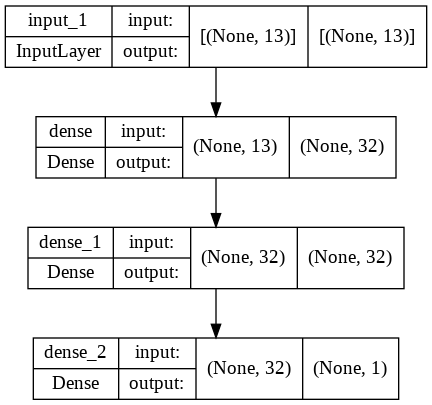

In [ ]:
########
# 모델링
########
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(13,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01))

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 3912.9583
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 298.6395
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 140.8153
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 80.7354
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 67.6459
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 65.7690
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 66.6598
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 64.0466
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 64.9336
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 61.8652


In [ ]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)
y_pred[:5]

array([[21.718254],
       [15.965277],
       [14.382782],
       [27.374979],
       [14.621272]], dtype=float32)

In [ ]:
y_test[:5]

array([20.1, 11.9, 20.6, 33.2, 20.8])